In [86]:
from lightgbm import LGBMRegressor
from DataProcessor import DataProcessor
from Trainer import Trainer, get_MAPE, get_SMAPE
from AnomalyDetector import AnomalyDetector
# choose ML model for time series
MODEL =  LGBMRegressor(random_state=42)
PARAM_GRID = {
            'num_leaves': [16, 24, 31],
            'learning_rate': [0.005, 0.01, 0.05],
            'n_estimators': [32, 100],
            'subsample': [0.8, 1.0],
            'colsample_bytree': [0.8, 1.0],
            }


Turbine = DataProcessor('Turbine1.csv', 'Turbine2.csv')

# Clean and reorder data for Turbine1 and Turbine2
Turbine.df1 = Turbine.clean(Turbine.df1)
Turbine.df2 = Turbine.clean(Turbine.df2)

# Create additional time series features
Turbine.df1 = Turbine.add_features(Turbine.df1)
Turbine.df2 = Turbine.add_features(Turbine.df2)
    
# Combine and aggregate the data
combined_data = Turbine.aggregate()

# initiate Trainer class
trainer = Trainer(combined_data)
# Auto feature selection
trainer.features = trainer.select_features(n= 10) #Or set it manually e.g: ["Wind"]   

# Split data into train and test sets
x_train, x_test, y_train, y_test = trainer.data_splitter()
# fine tune via GridSearch
MODEL = trainer.tune(PARAM_GRID, MODEL, x_train, y_train)
# Train and evaluate the model
lgb_model = trainer.train(MODEL, x_train, y_train)
sampe, mape, mae = trainer.evaluate(lgb_model, x_test, y_test)

print("MAPE:", mape)
print("SMAPE:", sampe)
print("MAE:", mae)
    


Fitting 5 folds for each of 72 candidates, totalling 360 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000622 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2454
[LightGBM] [Info] Number of data points in the train set: 10482, number of used features: 10
[LightGBM] [Info] Start training from score 444.713280
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000476 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2454
[LightGBM] [Info] Number of data points in the train set: 10482, number of used features: 10
[LightGBM] [Info] Start training from score 444.713280


NameError: name 'get_MAPE' is not defined

c:\Users\manaf\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


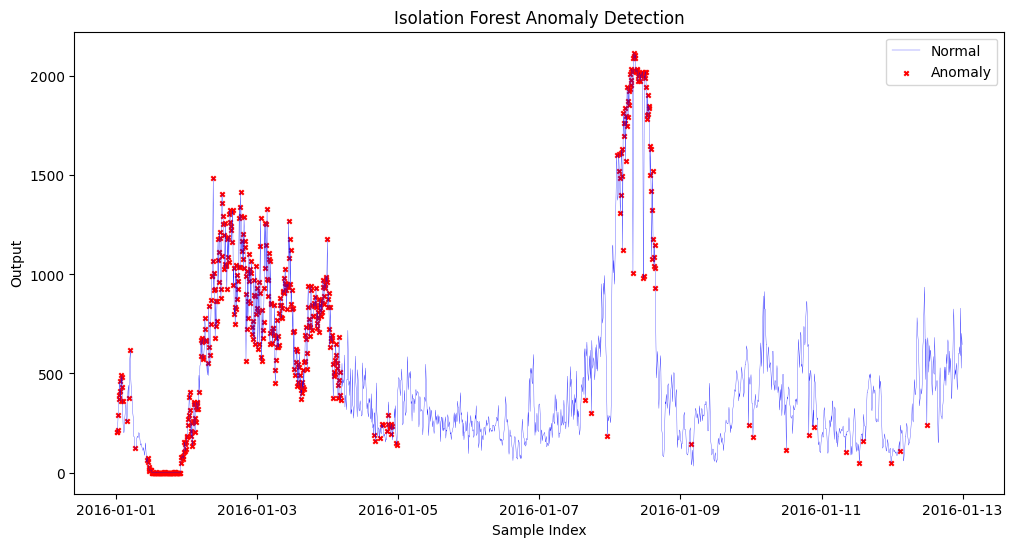

In [ ]:
from AnomalyDetector import AnomalyDetector

# Instantiate AnomalyDetector
anomaly_detector = AnomalyDetector(combined_data)
# Fit the Isolation Forest model
anomaly_detector.fit_model()
# Detect anomalies
anomaly_detector.detect_anomalies()
# Visualize anomalies
anomaly_detector.visualize_anomalies(until_date= '2016-1-13')



In [ ]:
# show t-SNE
anomaly_detector.visualize_tsne()